### Задание
Возьмите датасет Mortality and Water Hardness.
В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

### 2 Задача 
ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Python\\Notebook\\statistics\\files\\water.csv', sep=',')

In [4]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:title={'center':'Взаимосвязь между средней годовой смертностью на 100000 населения и концентрации кальция в питьевой воде'}, xlabel='mortality', ylabel='hardness'>

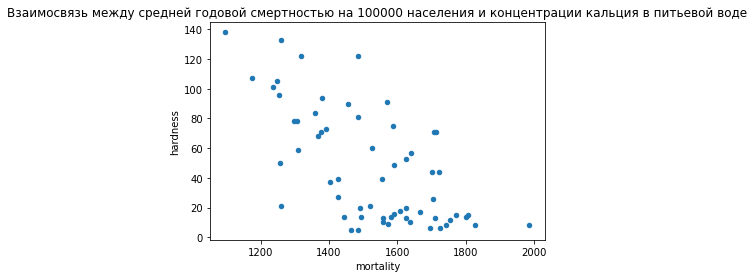

In [5]:
# Построим точечный график
df.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Взаимосвязь между средней годовой смертностью на 100000 населения и концентрации кальция в питьевой воде')

In [8]:
# Рассчитаем коэффициенты корреляции Пирсона и Спирмена
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [9]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


### Вывод:
Исходя из точечного графика и коэффициентов Пирсона и Спирмэна видим, что между показателями средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе есть достаточно сильная связь. Обратная корреляция - чем больше концентрации кальция, тем меньше смертность.

In [11]:
# Построим модель линейной регрессии
X = df[['mortality']]
y = df['hardness']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
X_train.shape

(48, 1)

In [24]:
y_train.shape

(48,)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.coef_

array([-0.13495101])

In [27]:
model.intercept_

254.4890011110471

In [28]:
y_pred = model.predict(X_test)
y_pred

array([ 15.35580534,  39.78193877,  86.20508739,  40.32174283,
        39.78193877,  68.52650463,  33.57419215,  84.45072421,
        84.85557725,  69.74106375, 106.58269041,  49.49841174,
        37.35282053])

In [29]:
# Рассчитаем значение коэффициента детерминации
model.score(X_test, y_test) 

0.45943206820550986

Коэффициент детерминации невысокий, означает, что зависимость смертности всего лишь на 46% обусловления концентрацией кальция в воде и на 54% - влиянием прочих факторов. 

Следовательно, модель регрессии пригодна для принятия некоторых решений, но не для прогнозирования.

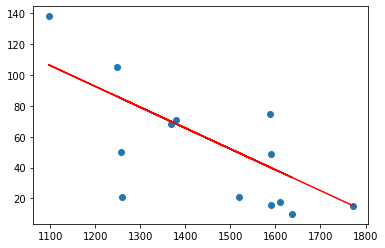

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

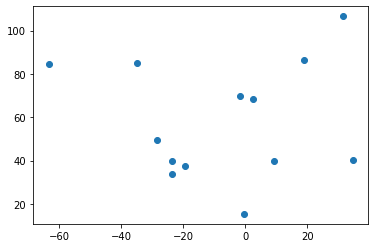

In [34]:
# График остатков
residuals = y_test - y_pred

plt.scatter(residuals, y_pred)

В графике остатков точки распределяются случайным образом. Поэтому модель линейной регрессии является предпочтительной.

### 3 Задание
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [36]:
df_south = df[df.location=='South']
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [37]:
df_north = df[df.location=='North']
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:title={'center':'Взаимосвязь между средней годовой смертностью на 100000 населения и концентрации кальция в питьевой воде на Юге'}, xlabel='mortality', ylabel='hardness'>

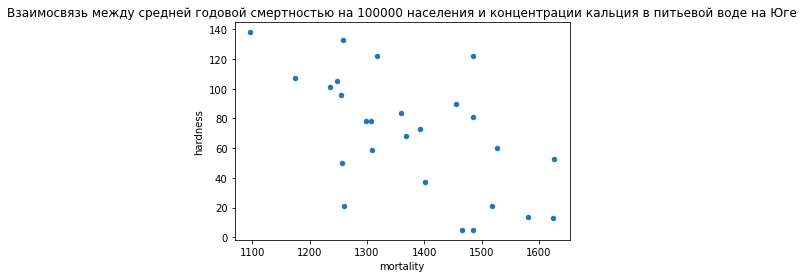

In [38]:
# Построим точечный график для южных городов
df_south.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Взаимосвязь между средней годовой смертностью на 100000 населения и концентрации кальция в питьевой воде на Юге')

<AxesSubplot:title={'center':'Взаимосвязь между средней годовой смертностью на 100000 населения и концентрации кальция в питьевой воде на Севере'}, xlabel='mortality', ylabel='hardness'>

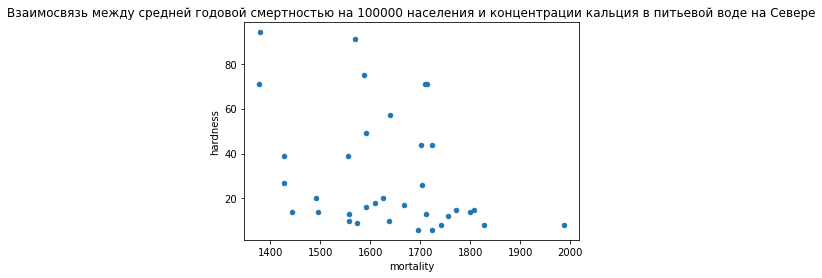

In [39]:
# Построим точечный график для северных городов
df_north.plot(kind='scatter', 
        x='mortality', 
        y='hardness', 
        title='Взаимосвязь между средней годовой смертностью на 100000 населения и концентрации кальция в питьевой воде на Севере')

In [42]:
# Рассчитаем коэффициенты корреляции Пирсона и Спирмена для южных городов
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [44]:
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [45]:
# Рассчитаем коэффициенты корреляции Пирсона и Спирмена для северных городов
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [46]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


### Вывод:
Исходя из точечного графика и коэффициентов Пирсона и Спирмэна видим, что на Юге страны есть связь между показателями. Обратная корреляция - чем больше концентрации кальция, тем меньше смертность.
В северных же городах эта связь слабая, нелинейная.

In [47]:
# Построим модель линейной регрессии для южных городов
X = df_south[['mortality']]
y = df_south['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model_south = LinearRegression()
model_south.fit(X_train, y_train)

LinearRegression()

In [50]:
model_south.coef_

array([-0.15513861])

In [51]:
model_south.intercept_

283.1034409876937

In [52]:
y_pred = model_south.predict(X_test)
y_pred

array([67.15049009, 70.71867822, 65.59910395, 89.64558915, 47.4478861 ,
       78.63074754])

In [53]:
# Рассчитаем значение коэффициента детерминации для южных городов
model_south.score(X_test, y_test) 

0.505028629834495

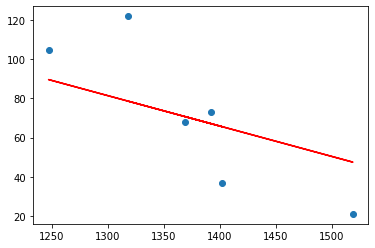

In [54]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

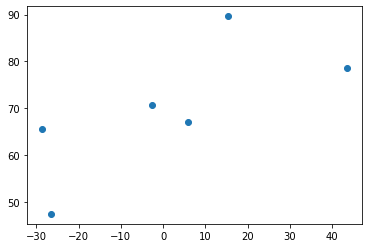

In [55]:
# График остатков
residuals = y_test - y_pred

plt.scatter(residuals, y_pred)

In [57]:
# Построим модель линейной регрессии для северных городов
X = df_north[['mortality']]
y = df_north['hardness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model_north = LinearRegression()
model_north.fit(X_train, y_train)

LinearRegression()

In [58]:
model_north.coef_

array([-0.08168579])

In [59]:
model_north.intercept_

161.04360913555976

In [60]:
y_pred = model_north.predict(X_test)
y_pred

array([31.08152023, 21.44259723, -1.26605187, 28.30420343, 27.07891661,
       44.39630369, 34.0222086 ])

In [61]:
# Рассчитаем значение коэффициента детерминации для северных городов
model_north.score(X_test, y_test) 

-0.40834532464390816

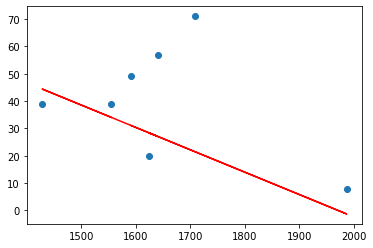

In [62]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

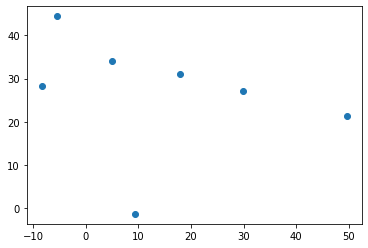

In [63]:
# График остатков
residuals = y_test - y_pred

plt.scatter(residuals, y_pred)